In [1]:
import open3d as o3d
print(o3d.__version__)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
0.17.0


# Visulization Method 1 ==> creating sphere

In [2]:
import open3d as o3d

# Create a sphere mesh
mesh = o3d.geometry.TriangleMesh.create_sphere()

# Compute vertex normals
mesh.compute_vertex_normals()

# Visualize the mesh (this will open an external window)
o3d.visualization.draw_geometries([mesh])

In [3]:
pip install pythreejs ipywidgets

Note: you may need to restart the kernel to use updated packages.


# Visulization Method 2

In [4]:
import open3d as o3d
from open3d.visualization import draw_geometries

# Create a sphere mesh
mesh = o3d.geometry.TriangleMesh.create_sphere()

# Compute vertex normals
mesh.compute_vertex_normals()

# Visualize the mesh in a Jupyter notebook using pythreejs
o3d.visualization.draw_geometries([mesh], window_name="Open3D in Jupyter", width=1000, height=6000)

## Tensor

In [5]:
import open3d.core as o3c
import numpy as np

In [6]:
import open3d.core as o3c

# Check if CUDA is available
if o3c.cuda.is_available():
    print("CUDA is available!")
else:
    print("CUDA is not available.")

CUDA is not available.


In [7]:
# Tensor from list.
a = o3c.Tensor([0, 1, 2])
print("Created from list:\n{}".format(a))

# Tensor from Numpy.
a = o3c.Tensor(np.array([0, 1, 2]))
print("\nCreated from numpy array:\n{}".format(a))

# Dtype and inferred from list.
a_float = o3c.Tensor([0.0, 1.0, 2.0])
print("\nDefault dtype and device:\n{}".format(a_float))

# Specify dtype.
a = o3c.Tensor(np.array([0, 1, 2]), dtype=o3c.Dtype.Float64)
print("\nSpecified data type:\n{}".format(a))

# Specify device.
a = o3c.Tensor(np.array([0, 1, 2]), device=o3c.Device("CUDA:0")) ## Error bcz ==> CUDA is not installed
print("\nSpecified device:\n{}".format(a))

Created from list:
[0 1 2]
Tensor[shape={3}, stride={1}, Int32, CPU:0, 0x217fb00cea0]

Created from numpy array:
[0 1 2]
Tensor[shape={3}, stride={1}, Int32, CPU:0, 0x217fb00cd20]

Default dtype and device:
[0.0 1.0 2.0]
Tensor[shape={3}, stride={1}, Float64, CPU:0, 0x217fb00cf80]

Specified data type:
[0.0 1.0 2.0]
Tensor[shape={3}, stride={1}, Float64, CPU:0, 0x217fb00cf60]


RuntimeError: [Open3D Error] (class std::shared_ptr<class open3d::core::MemoryManagerDevice> __cdecl open3d::core::MemoryManager::GetMemoryManagerDevice(const class open3d::core::Device &)) D:\a\Open3D\Open3D\cpp\open3d\core\MemoryManager.cpp:123: Unsupported device "CUDA:0". Set BUILD_CUDA_MODULE=ON to compile for CUDA support and BUILD_SYCL_MODULE=ON to compile for SYCL support.


## Point Cloud

## Visualize point cloud

In [3]:
# Open3d in-built dataset 

import open3d as o3d
import numpy as np

print("Load a ply point cloud, print it, and render it")

# Load the sample PLY point cloud from Open3D's dataset
ply_point_cloud = o3d.data.PLYPointCloud()
pcd = o3d.io.read_point_cloud(ply_point_cloud.path)

# Print the point cloud object and its points
print(pcd)  # Print point cloud object
print(np.asarray(pcd.points))  # Print points as a NumPy array

# Visualize the point cloud in an interactive window
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])


Load a ply point cloud, print it, and render it
PointCloud with 196133 points.
[[0.65234375 0.84686458 2.37890625]
 [0.65234375 0.83984375 2.38430572]
 [0.66737998 0.83984375 2.37890625]
 ...
 [2.00839925 2.39453125 1.88671875]
 [2.00390625 2.39488506 1.88671875]
 [2.00390625 2.39453125 1.88793314]]


In [ ]:
# Local dataset

import open3d as o3d
import numpy as np

# Load the point cloud from a PLY file
pcd = o3d.io.read_point_cloud("C:/Users/sumit/Downloads/bunny/bunny/reconstruction/bun_zipper_res2.ply")

# Print the point cloud and its points as a NumPy array
print(pcd)
print(np.asarray(pcd.points))

# Set better camera parameters to ensure the point cloud is visible
vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry(pcd)

# Adjust camera parameters manually to ensure a good view of the point cloud
view_control = vis.get_view_control()
view_control.set_zoom(0.5)  # Zoom out a bit if the cloud is small
view_control.set_front([1.0, -1.0, 0.0])  # Front direction
view_control.set_lookat([0.0, 0.0, 0.0])  # Look at the center of the point cloud
view_control.set_up([0.0, 0.0, 1.0])  # Up direction

# Run the visualization loop
vis.run()
vis.destroy_window()

## Voxel downsampling

## Down sampling for in-built dataset

In [4]:
print("Downsample the point cloud with a voxel of 0.05")
downpcd = pcd.voxel_down_sample(voxel_size=0.05)
o3d.visualization.draw_geometries([downpcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

Downsample the point cloud with a voxel of 0.05


## Down sampling for Local Dataset

In [2]:
import open3d as o3d
import numpy as np

# Load the point cloud from a PLY file
pcd = o3d.io.read_point_cloud("C:/Users/sumit/Downloads/bunny/bunny/reconstruction/bun_zipper_res2.ply")

# Print the point cloud and its points as a NumPy array
print(pcd)
print(np.asarray(pcd.points))

# Downsample the point cloud with a voxel size of 0.05 (you can change this value)
downpcd = pcd.voxel_down_sample(voxel_size=0.01)

# Print the downsampled point cloud and its points
print("Downsampled PointCloud")
print(downpcd)
print(np.asarray(downpcd.points))

# Set better camera parameters to ensure the point cloud is visible
vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry(downpcd)  # Use the downsampled point cloud instead of the original one

# Adjust camera parameters manually to ensure a good view of the point cloud
view_control = vis.get_view_control()
view_control.set_zoom(0.5)  # Zoom out a bit if the cloud is small
view_control.set_front([1.0, -1.0, 0.0])  # Front direction
view_control.set_lookat([0.0, 0.0, 0.0])  # Look at the center of the point cloud
view_control.set_up([0.0, 0.0, 1.0])  # Up direction

# Run the visualization loop
vis.run()
vis.destroy_window()


PointCloud with 8171 points.
[[-0.036872    0.127727    0.00440925]
 [-0.0453607   0.128854    0.00114541]
 [-0.0690069   0.151612    0.0366018 ]
 ...
 [-0.0643695   0.149877   -0.0298747 ]
 [-0.0528961   0.143026   -0.00045591]
 [-0.0318636   0.155275   -0.00893878]]
Downsampled PointCloud
PointCloud with 752 points.
[[-0.07482782  0.1026933   0.03693172]
 [-0.06065983  0.04096267  0.0440672 ]
 [ 0.01593222  0.12479539  0.02880799]
 ...
 [-0.00363411  0.03478754  0.04172944]
 [-0.05440521  0.03449606  0.03823843]
 [-0.0600966   0.05817     0.0131277 ]]


## Vertex Normal Estimation

In [62]:
print("Recompute the normal of the downsampled point cloud")
downpcd.estimate_normals(
    search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
o3d.visualization.draw_geometries([downpcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024],
                                  point_show_normal=True)

Recompute the normal of the downsampled point cloud


In [ ]:
# This one is also run as original 

print("Recompute the normal of the downsampled point cloud")
downpcd.estimate_normals(
    search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
o3d.visualization.draw_geometries([downpcd],point_show_normal = True)

In [ ]:
print("Print a normal vector of the 0th point")
print(downpcd.normals[0])

In [ ]:
print("Print the normal vectors of the first 10 points")
print(np.asarray(downpcd.normals)[:10, :])

In [ ]:
help(downpcd)

In [ ]:
o3d.visualization.draw_geometries([downpcd], point_show_normal=True)

## Crop Point Cloud

In [22]:
print("Load a polygon volume and use it to crop the original point cloud")
demo_crop_data = o3d.data.DemoCropPointCloud()
pcd = o3d.io.read_point_cloud(demo_crop_data.point_cloud_path)
vol = o3d.visualization.read_selection_polygon_volume(demo_crop_data.cropped_json_path)
chair = vol.crop_point_cloud(pcd)
o3d.visualization.draw_geometries([chair],
                                  zoom=0.7,
                                  front=[0.5439, -0.2333, -0.8060],
                                  lookat=[2.4615, 2.1331, 1.338],
                                  up=[-0.1781, -0.9708, 0.1608])

Load a polygon volume and use it to crop the original point cloud


## Paint point cloud

In [12]:
print("Paint chair")
chair.paint_uniform_color([1, 0.706, 0]) # Normalize the color Range between 0 to 1 (R,G,B)
o3d.visualization.draw_geometries([chair],
                                  zoom=0.7,
                                  front=[0.5439, -0.2333, -0.8060],
                                  lookat=[2.4615, 2.1331, 1.338],
                                  up=[-0.1781, -0.9708, 0.1608])

Paint chair


## Point cloud distance

In [13]:
# Load data
demo_crop_data = o3d.data.DemoCropPointCloud()
pcd = o3d.io.read_point_cloud(demo_crop_data.point_cloud_path)
vol = o3d.visualization.read_selection_polygon_volume(demo_crop_data.cropped_json_path)
chair = vol.crop_point_cloud(pcd)

dists = pcd.compute_point_cloud_distance(chair)
dists = np.asarray(dists)
ind = np.where(dists > 0.01)[0]
pcd_without_chair = pcd.select_by_index(ind)
o3d.visualization.draw_geometries([pcd_without_chair],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

## Caluculating The distance of cloud by manually applying ==> Chamfer Distance Formula..

In [40]:
import open3d as o3d
import numpy as np

# Load data
demo_crop_data = o3d.data.DemoCropPointCloud()
pcd = o3d.io.read_point_cloud(demo_crop_data.point_cloud_path)
vol = o3d.visualization.read_selection_polygon_volume(demo_crop_data.cropped_json_path)
chair = vol.crop_point_cloud(pcd)

# Compute point-to-point distances from source (pcd) to target (chair)
dists_source_to_target = pcd.compute_point_cloud_distance(chair)
dists_source_to_target = np.asarray(dists_source_to_target)

# Compute point-to-point distances from target (chair) to source (pcd)
dists_target_to_source = chair.compute_point_cloud_distance(pcd)
dists_target_to_source = np.asarray(dists_target_to_source)

# Compute Chamfer distance: average of distances in both directions
chamfer_distance = (np.mean(dists_source_to_target) + np.mean(dists_target_to_source)) / 2

# Optionally, select points from the source (pcd) that are more than 0.01 units away from the chair (target)
ind = np.where(dists_source_to_target > 0.01)[0]
pcd_without_chair = pcd.select_by_index(ind)

# Visualize the result (point cloud with points away from the chair)
o3d.visualization.draw_geometries([pcd_without_chair],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

# Output Chamfer distance
print("Chamfer distance: ", chamfer_distance)


Chamfer distance:  0.2836171078537606


## Bounding volumes

In [43]:
aabb = chair.get_axis_aligned_bounding_box()
aabb.color = (1, 0, 0)
obb = chair.get_oriented_bounding_box()
obb.color = (0, 1, 0)
o3d.visualization.draw_geometries([chair, aabb, obb],
                                  zoom=0.7,
                                  front=[0.5439, -0.2333, -0.8060],
                                  lookat=[2.4615, 2.1331, 1.338],
                                  up=[-0.1781, -0.9708, 0.1608])

## Convex hull

In [26]:
bunny = o3d.data.BunnyMesh()
mesh = o3d.io.read_triangle_mesh(bunny.path)
mesh.compute_vertex_normals()

pcl = mesh.sample_points_poisson_disk(number_of_points=2000)
hull, _ = pcl.compute_convex_hull()
hull_ls = o3d.geometry.LineSet.create_from_triangle_mesh(hull)
hull_ls.paint_uniform_color((1, 0, 0))
o3d.visualization.draw_geometries([pcl, hull_ls])

## DBSCAN clustering

In [29]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
ply_point_cloud = o3d.data.PLYPointCloud()
pcd = o3d.io.read_point_cloud(ply_point_cloud.path)

with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(
        pcd.cluster_dbscan(eps=0.02, min_points=10, print_progress=True))
print("Unique cluster labels:", np.unique(labels))

max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.455,
                                  front=[-0.4999, -0.1659, -0.8499],
                                  lookat=[2.1813, 2.0619, 2.0999],
                                  up=[0.1204, -0.9852, 0.1215])

[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 10
Unique cluster labels: [-1  0  1  2  3  4  5  6  7  8  9]
point cloud has 10 clusters


## Visulization using ==> plotly 

## tab 20 colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0), (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), (1.0, 0.7333333333333333, 0.47058823529411764, 1.0), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0), (0.596078431372549, 0.8745098039215686, 0.5411764705882353, 1.0), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0), (1.0, 0.596078431372549, 0.5882352941176471, 1.0), (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0), (0.7725490196078432, 0.6901960784313725, 0.8352941176470589, 1.0), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0), (0.7686274509803922, 0.611764705882353, 0.5803921568627451, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.9686274509803922, 0.7137254901960784, 0.8235294117647058, 1.0), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0), (0.7803921568627451, 0.78039215686

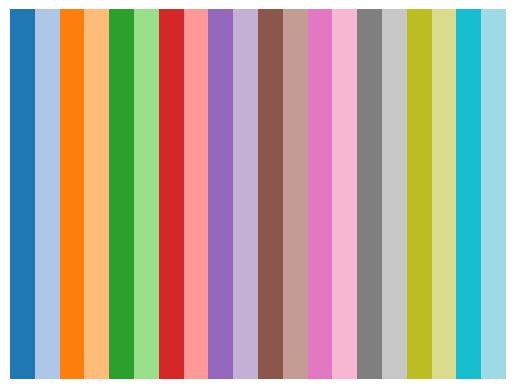

In [3]:
import matplotlib.pyplot as plt

# Accessing the 'tab20' colormap
cmap = plt.get_cmap("tab20")

# Let's access the first 20 colors from the colormap (it's a list of colors)
colors = [cmap(i) for i in range(20)]

# Print or display the colors
print(colors)  # This will print out the RGB values of the first 20 colors

# Visualize the colors
import numpy as np

# Create an image (just a strip) to visualize the colors
color_strip = np.linspace(0, 1, 20).reshape(1, 20)  # One row, 20 columns
plt.imshow(color_strip, aspect="auto", cmap="tab20")
plt.axis("off")
plt.show()

## Plane Segmentation

In [32]:
pcd_point_cloud = o3d.data.PCDPointCloud()
pcd = o3d.io.read_point_cloud(pcd_point_cloud.path)

plane_model, inliers = pcd.segment_plane(distance_threshold=0.01,
                                         ransac_n=3,
                                         num_iterations=1000)
[a, b, c, d] = plane_model
print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

inlier_cloud = pcd.select_by_index(inliers)
inlier_cloud.paint_uniform_color([1.0, 0, 0])
outlier_cloud = pcd.select_by_index(inliers, invert=True)
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud],
                                  zoom=0.8,
                                  front=[-0.4999, -0.1659, -0.8499],
                                  lookat=[2.1813, 2.0619, 2.0999],
                                  up=[0.1204, -0.9852, 0.1215])

Plane equation: -0.04x + -0.09y + 0.99z + -1.10 = 0


## Visulization using ==> plotly 

## Planner Patch Detection

In [7]:
dataset = o3d.data.PCDPointCloud()
pcd = o3d.io.read_point_cloud(dataset.path)
assert (pcd.has_normals())

# using all defaults
oboxes = pcd.detect_planar_patches(
    normal_variance_threshold_deg=60,
    coplanarity_deg=75,
    outlier_ratio=0.75,
    min_plane_edge_length=0,
    min_num_points=0,
    search_param=o3d.geometry.KDTreeSearchParamKNN(knn=30))

print("Detected {} patches".format(len(oboxes)))

geometries = []
for obox in oboxes:
    mesh = o3d.geometry.TriangleMesh.create_from_oriented_bounding_box(obox, scale=[1, 1, 0.0001])
    mesh.paint_uniform_color(obox.color)
    geometries.append(mesh)
    geometries.append(obox)
geometries.append(pcd)

o3d.visualization.draw_geometries(geometries,
                                  zoom=0.62,
                                  front=[0.4361, -0.2632, -0.8605],
                                  lookat=[2.4947, 1.7728, 1.5541],
                                  up=[-0.1726, -0.9630, 0.2071])

Detected 10 patches


## Hidden Point Removal

In [3]:
import numpy as np
print("Convert mesh to a point cloud and estimate dimensions")
armadillo = o3d.data.ArmadilloMesh()
mesh = o3d.io.read_triangle_mesh(armadillo.path)
mesh.compute_vertex_normals()

pcd = mesh.sample_points_poisson_disk(5000)
diameter = np.linalg.norm( # calculate the eulidian distance
    np.asarray(pcd.get_max_bound()) - np.asarray(pcd.get_min_bound()))
o3d.visualization.draw_geometries([pcd])

Convert mesh to a point cloud and estimate dimensions


In [4]:
print("Define parameters used for hidden_point_removal")
camera = [0, 0, diameter]
radius = diameter * 100

print("Get all points that are visible from given view point")
_, pt_map = pcd.hidden_point_removal(camera, radius)

print("Visualize result")
pcd = pcd.select_by_index(pt_map)
o3d.visualization.draw_geometries([pcd])

Define parameters used for hidden_point_removal
Get all points that are visible from given view point
Visualize result
